# Proyecto Minería de Datos

**Objetivo General:** Crear un modelo con Machine Learning que pronostique tendencias, para relacionar productos que sean ideales para ventas cruzadas, en base a las transacciones de clientes.

**Dataset:** https://www.kaggle.com/mathchi/online-retail-ii-data-set-from-ml-repository

**Problema:** Para una empresa cualquiera, le es importante mejorar sus ventas o servicios de acuerdo a las necesidades del cliente. Los grandes negocios implementan procesos inteligentes acorde a las acciones de sus clientes, para lograr mejorar sus ingresos, algunos de estos procedimientos están basados en los conocimientos de marketing, Big Data, Smart Data, estadística. Sin embargo para lograr el objetivo de aumentar las ventas, es necesario tener una base de datos de las transacciones realizadas para el análisis de los datos, por tal motivo en este proyecto se enfoca en la creación de un modelo que pueda
predecir tendencias de agrupaciones de productos en base a las compras realizadas por diferentes clientes en una tienda de regalos del Reino Unido entre el 2009 y 2011.

**Tema:** Modelo de pronóstico de tendencias para ventas cruzadas de una tienda de regalos del
Reino Unido entre el 2009 a 2011

**Librerías**

In [1]:
# Usada para la importación de los datos
import pandas as pd
# Usada para la graficación
import matplotlib.pyplot as plt
# Usada para la graficación
import seaborn as sns
# La escala para normalización
from sklearn.preprocessing import StandardScaler, RobustScaler
# Para la separación del dataset
from sklearn.model_selection import train_test_split

## Análisis de los datos

En este apartado se hace un análisis de los datos, para saber si existen datos nulos, el número de registros, distribución de los datos.

**Importación del dataset**

In [2]:
#Función para la lectura del dataset
def importdata():
    df = pd.read_csv('dataset/Year_2009-2011.csv',encoding='unicode_escape')
    print("Estadísticas del dataset: \n", df.describe().T)
    print("Tamaño del dataset: \n", df.shape)
    return df

In [3]:
#Función para ver si existen datos nulos
def datosnull(df):
    existen_bol=1
    total_register=len(df.index)
    total_nan_values = df.isnull().sum().sum()
    existen=total_register-total_nan_values
    if(existen != 0):
        print("Número de datos nulos: ", total_nan_values)
        print("Número de registros finales: ", existen)
        df=eraseregis(df)
        return existen_bol, df
    else:
        return 0

In [5]:
data=importdata()
existen_bol,df=datosnull(data)
print("Total de registros :", len(data))

Estadísticas del dataset: 
                  count          mean          std       min       25%  \
Quantity     1033036.0     10.076879   175.197628 -80995.00      1.00   
Price        1033036.0      4.613980   122.397523 -53594.36      1.25   
Customer ID   797885.0  15313.062777  1696.466663  12346.00  13964.00   

                 50%       75%      max  
Quantity         3.0     10.00  80995.0  
Price            2.1      4.15  38970.0  
Customer ID  15228.0  16788.00  18287.0  
Tamaño del dataset: 
 (1033036, 8)
Número de datos nulos:  239426
Número de registros finales:  793610
Total de registros : 1033036


In [12]:
data['Customer ID'].isnull().sum()

235151

In [13]:
data['Quantity'].isnull().sum()

0

In [14]:
data['StockCode'].isnull().sum()

0

In [6]:
#Función para graficar con puntos
def grapscat(x,y,color):
    plt.scatter(x, y, alpha=0.3, c=color)
    plt.show

In [8]:
#Función para graficar en barras
def grapbar(df):
    df['StockCode'].value_counts().plot(kind='bar')

## Selección de las variables

En esta sección se escogen las variables x & y del dataset

In [6]:
x=df[['Customer ID','Quantity','StockCode']]
y=df['StockCode']

## Limpieza y transformación

En esta sección se eliminan los registros con datos nulos, a partir de la selección de variables, también se hace la imputación de datos.

**Eliminación de datos nulos**

In [7]:
#Función para eliminación de registros con datos nulos
def eraseregis(data):
    data = data.dropna()
    return data

In [8]:
x

,Customer ID,Quantity,StockCode
0,13085.0,12,85048
1,13085.0,12,79323P
2,13085.0,12,79323W
3,13085.0,48,22041
4,13085.0,24,21232
...,...,...,...
1033031,12680.0,6,22899
1033032,12680.0,4,23254
1033033,12680.0,4,23255
1033034,12680.0,3,22138


In [9]:
existen_bol,df=datosnull(x)

Número de datos nulos:  0
Número de registros finales:  797885


In [10]:
x.dtypes

Customer ID    float64
Quantity         int64
StockCode       object
dtype: object

In [11]:
#Función para realizar algunos procesos en los datos para limpiarlos y borrar registros con errores
def limpieza(x):
    #Elimina letras del StockCode
    x['StockCode'] = x['StockCode'].replace({'[A-Z]':''}, regex=True)
    #Para convertir StockCode de objeto a numérico
    x['StockCode'] = pd.to_numeric(x['StockCode'], errors='coerce')
    print("Nuevo dataset: \n", x)
    print("Tipos de datos: \n", x.dtypes)
    return x

In [12]:
#Eliminación de datos NaN
def eliminaregistros(x):
    #Elimina los registros que tenga valor NaN
    existen_bol,x = datosnull(x)
    #Convierte a entero
    x=x.astype(int)
    print("Nuevo dataset: \n", x)
    print("Tipos de datos: \n", x.dtypes)
    return x

In [13]:
x=limpieza(x)
x=eliminaregistros(x)

Nuevo dataset: 
          Customer ID  Quantity  StockCode
0            13085.0        12    85048.0
1            13085.0        12    79323.0
2            13085.0        12    79323.0
3            13085.0        48    22041.0
4            13085.0        24    21232.0
...              ...       ...        ...
1033031      12680.0         6    22899.0
1033032      12680.0         4    23254.0
1033033      12680.0         4    23255.0
1033034      12680.0         3    22138.0
1033035      12680.0         1        NaN

[797885 rows x 3 columns]
Tipos de datos: 
 Customer ID    float64
Quantity         int64
StockCode      float64
dtype: object
Número de datos nulos:  3387
Número de registros finales:  794498
Nuevo dataset: 
          Customer ID  Quantity  StockCode
0              13085        12      85048
1              13085        12      79323
2              13085        12      79323
3              13085        48      22041
4              13085        24      21232
...             

In [14]:
x

,Customer ID,Quantity,StockCode
0,13085,12,85048
1,13085,12,79323
2,13085,12,79323
3,13085,48,22041
4,13085,24,21232
...,...,...,...
1033030,12680,12,22613
1033031,12680,6,22899
1033032,12680,4,23254
1033033,12680,4,23255


**Transformación - Escala y División del dataset**

In [15]:
#División del dataset, en conjunto de datos de entrenamiento y otro conjunto para las pruebas
def slipdata(df):
    X_train, X_test, y_train, y_test = train_test_split(df, df['StockCode'], test_size=0.3, random_state=109)
    return X_train, X_test, y_train, y_test

In [16]:
# Función para la ESTANDARIZACIÓN
def standa(X_train, X_test, y_train, y_test):
    scaler = StandardScaler()
    scaler.fit(X_train)

    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
    X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)
    
    return X_train_scaled, X_test_scaled

In [17]:
# Función de la gráfica de la estandarización
def graficar(X_train,X_train_scaled):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 6))

    for (label, content) in X_train.iteritems():
        ax1.set_title('Antes del escalado')
        sns.kdeplot(X_train[label], ax=ax1, label=label)
        leg = ax1.legend(loc="upper right", bbox_to_anchor=[0, 1], ncol=2, shadow=True, title="Características", fancybox=True)
    
    for (label, content) in X_train_scaled.iteritems():
        ax2.set_title('Después del escalado')
        sns.kdeplot(X_train_scaled[label], ax=ax2, label=label)
        leg = ax2.legend(loc="upper right", bbox_to_anchor=[0, 1], ncol=2, shadow=True, title="Características", fancybox=True)

    plt.show()

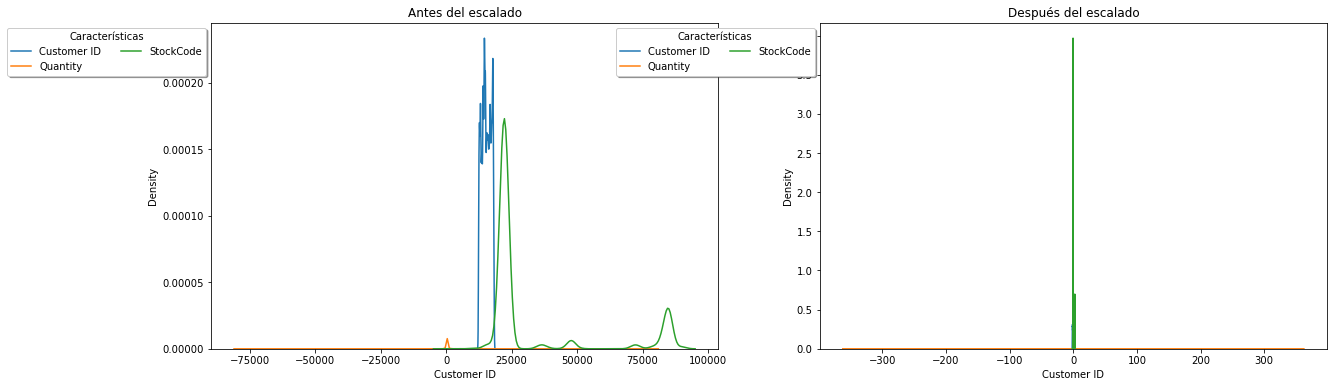

In [18]:
X_train, X_test, y_train, y_test=slipdata(x)
X_train_scaled, X_test_scaled=standa(X_train, X_test, y_train, y_test)
graficar(X_train,X_train_scaled)

In [19]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,1033036.0,10.076879,175.197628,-80995.00,1.00,3.0,10.00,80995.0
Price,1033036.0,4.613980,122.397523,-53594.36,1.25,2.1,4.15,38970.0
Customer ID,797885.0,15313.062777,1696.466663,12346.00,13964.00,15228.0,16788.00,18287.0


In [20]:
x.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer ID,794498.0,15319.407844,1693.495567,12346.0,13971.0,15241.0,16791.0,18287.0
Quantity,794498.0,12.648846,192.045804,-80995.0,2.0,5.0,12.0,80995.0
StockCode,794498.0,33108.116258,22950.327532,1.0,21807.0,22480.0,23290.0,90214.0
